# Wiring diagrams in Graphviz


Catlab can draw wiring diagrams using the `dot` program in
[Graphviz](https://www.graphviz.org/). This feature requires that Graphviz be
installed, but does not require any additional Julia packages.

In [1]:
using Catlab.WiringDiagrams, Catlab.Graphics

### Symmetric monoidal category

In [2]:
using Catlab.Doctrines

A, B = Ob(FreeSymmetricMonoidalCategory, :A, :B)
f = Hom(:f, A, B)
g = Hom(:g, B, A)
h = Hom(:h, otimes(A,B), otimes(A,B));

To start, here are a few very simple examples.

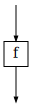

In [3]:
to_graphviz(f)

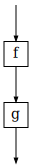

In [4]:
to_graphviz(compose(f,g))

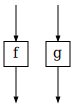

In [5]:
to_graphviz(otimes(f,g))

In the next example, notice how Graphviz automatically "untwists" the double
braiding to minimize edge crossings.

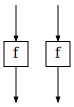

In [6]:
to_graphviz(compose(braid(A,A), otimes(f,f), braid(B,B)))

Here is a larger composite morphism.

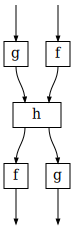

In [7]:
composite = compose(otimes(g,f), h, otimes(f,g))
to_graphviz(composite)

We can tell Graphviz to lay out the diagrams in the horizontal (left-to-right)
direction.

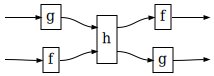

In [8]:
to_graphviz(composite, direction=:horizontal)

When working with very large diagrams (larger than the ones shown here), it is
sometimes convenient to omit the ports of the outer box and any wires attached
to them.

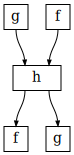

In [9]:
to_graphviz(composite, outer_ports=false)

### Biproduct category

In [10]:
A, B = Ob(FreeBiproductCategory, :A, :B)
f = Hom(:f, A, B)
g = Hom(:g, B, A);

By default, copies and merges are drawn the way they are represented
internally, as multiple wires.

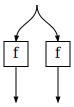

In [11]:
f1 = compose(mcopy(A), otimes(f,f))
to_graphviz(f1)

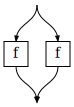

In [12]:
f2 = compose(mcopy(A), otimes(f,f), mmerge(B))
to_graphviz(f2)

To draw nodes for copies and merges, we need to add junctions to the wiring
diagram.

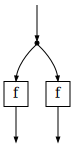

In [13]:
to_graphviz(add_junctions!(to_wiring_diagram(f1)))

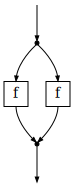

In [14]:
to_graphviz(add_junctions!(to_wiring_diagram(f2)))